<h1 style="font-size: 20pt">Python Notebook | Data Science | Pandas</h1><br/>

<b> Author: </b> Tamoghna Saha<br/> 
<b> Created: </b> Novemeber 2018<br/>
<b> Updated: </b> October 2022<br/>

![Python](../img/Python-programming.jpg)

# Table of Content:

* Pandas
    + Importing Data
    + Creating Test Object
    + Viewing Data
    + Data Cleaning
    + Selection
    + Filter, Sort & Group by
    + Iteration
    + Join, Merging
    + Statistics
    + Visualization
    + Exporting Data
* Cool tricks

# Pandas

Pandas is an open source data analysis library for providing easy-to-use data structures and data analysis tools.

`DataFrame` is a mXn vector where
* m is the number of rows
* n is the number of columns

`Series` is a mX1 vector. Hence, each column in DataFrame is known as a pandas series.

__NOTE__
* `df` - A pandas DataFrame object
* `s` - A pandas Series object

## Importing Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/googleplaystore.csv') #read from csv
df[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Other ways of importing data depending on the file type.

* `pd.read_table(filename)` - From a delimited text file (like TSV)
* `pd.read_excel(filename)` - From an Excel file 
* `pd.read_sql(query, connection_object)` - Reads from a SQL table/database
* `pd.read_json(json_string)` - Reads from a JSON file and extracts tables to a list of dataframes

## Create Test Objects
* `pd.DataFrame(dict)` - From a dict, keys for columns names, values for data as lists
* `pd.DataFrame(np.random.rand(20,5))` - 5 columns and 20 rows of random floats
* `pd.Series(my_list)` - Creates a series from an iterable `my_list`

In [2]:
df_test = pd.DataFrame(columns=['City','State'], data = [['Kolkata','West Bengal'], ['Bangalore','Karnataka']])
df_test

,City,State
0,Kolkata,West Bengal
1,Bangalore,Karnataka


In [3]:
# create example dataframe using numpy random
# 4 rows, 8 columns
pd.DataFrame(np.random.rand(4,8), columns=list('abcdefgh'))

,a,b,c,d,e,f,g,h
0,0.669332,0.386514,0.143920,0.350627,0.528329,0.449963,0.148226,0.229161
1,0.982229,0.568054,0.278588,0.474254,0.345683,0.058216,0.467230,0.077907
2,0.725238,0.470361,0.122976,0.332198,0.210157,0.556606,0.482039,0.462668
3,0.232270,0.908791,0.471147,0.592681,0.133166,0.776374,0.433599,0.492683


## Viewing Data

* `df.head(n)` - First n rows of the DataFrame [`replace head with tail`, you know what you will get]
* `df.shape` - Number of rows and columns 
* `df.info()` - Index, Datatype and Memory 
* `df.describe()` - Summary statistics for numerical columns
* `df.apply(pd.Series.value_counts)` - Unique values and counts for all columns

`s.value_counts(dropna=False)` - Views unique values and counts

In [4]:
print("df shape\n")
print(df.shape)
print("\n================")
print("df info\n")
df.info()

df shape

(10841, 13)

df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Selection

* `df[col]` or `df.col`- Returns column with label col as Series
* `df[[col1, col2]]` - Returns Columns as a new DataFrame
* `s.iloc[0]` - Selection by position/Integer-based indexing
* `s.loc[0]` - Selection by index/label-based indexing
* `df.loc[:, :]` and `df.iloc[:, :]` - First argument represents the number of rows and the second for columns
* `df.ix[0:a, 0:b]` - Arguments notation is same as above but returns a rows and (b-1) columns `[deprecated in Python 3]`

`iloc`:

__Rows:__
```
df.iloc[0] # first row of data frame
df.iloc[1] # second row of data frame
df.iloc[-1] # last row of data frame
```

__Columns:__
```
df.iloc[:,0] # first column of data frame
df.iloc[:,1] # second column of data frame
df.iloc[:,-1] # last column of data frame
```

In [5]:
# rows 0 to 4; selective columns using iloc
df.iloc[0:4,[0,1]]

,App,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN


In [6]:
# rows 0 to 4; all columns
df.loc[0:4,:] # : for columns is optional here since we are asking for all columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# rows 0 to 4; selective columns
df.loc[0:4,['App','Category']]

,App,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN


__NOTE__: 
* In `loc`, we are mentioning the column names for selection, while in `iloc` we are specifying the column number
* In `loc`, rows are getting printed including the upper bound, while in `iloc`, it is excluding it

Also __NOTE__ the following:
1. For creating a new DataFrame using column names `df[[col1, col2]]` is same as `df.loc[:,[col1, col2]]`
2. For printing the first 5 rows of the DataFrame `df[0:n]` is same as `df.iloc[0:n, :]`

## Data Cleaning

`DataFrame`
* `df.drop([col1, col2, col3], inplace = True, axis=1)` - Remove set of column(s)
* `df.isnull()` - Checks for null Values, Returns Boolean DataFrame
* `df.isnull().any()` - Returns boolean value for each column, gives True if any null value detected corresponding to that column
* `df.dropna()` - Drops all rows that contain null values
* `df.dropna(axis=1)` - Drops all columns that contain null values
* `df.fillna(x)` - Replaces all null values with x
* `df.columns = ['a','b','c']` - Renames columns
* `df.rename(columns = lambda x: x + '_1')` - Mass renaming of columns
* `df.rename(columns = {'old_name': 'new_name'})` - Selective renaming
* `df.rename(index = lambda x: x + 1)` - Mass renaming of index
* `df[new_col] = df.col1 + ', ' + df.col2` - Add two columns to create a new column in the same DataFrame

`Series`
* `s.replace(1,'one')` - Replaces all values equal to 1 with 'one'
* `s.replace([1,3], ['one','three'])` - Replaces all 1 with 'one' and 3 with 'three'

In [8]:
df.drop(['Category'], inplace=True, axis = 1)
df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df_any_null = df.isnull().any()
df_any_null

App               False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [10]:
df.dropna(axis=0, inplace=True)
df_check_null = df.isnull().any()
print(df.shape)
df_check_null

(9360, 12)


App               False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [11]:
df_new_cols_name = df.rename(columns = lambda x: (x.lower()).replace(' ','_'))
df_new_cols_name.head()

,app,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Filter, Sort & Group By

__Filter__
* `df[df[col] > 0.5]` - Rows where the values in col > 0.5
* `df[(df[col] > 0.5) & (df[col] < 0.7)]` - Rows where 0.7 > col > 0.5

__Sort__
* `df.sort_values(col1)` - Sorts values by col1 in ascending order
* `df.sort_values(col2,ascending=False)` - Sorts values by col2 in descending order
* `df.sort_values([col1,col2],ascending=[True,False])` - Sorts values by col1 in ascending order then col2 in descending order

__Groupby__
* `df.groupby(col)` - Returns a groupby object for values from one column
* `df.groupby([col1,col2])` - Returns a groupby object values from multiple columns
* `df.groupby(col1)[col2].mean()` - (Aggregation) Returns the mean of the values in col2, grouped by the values in col1 
* `df.pivot_table(index=col1,values=[col2,col3],aggfunc=mean)` - Creates a pivot table that groups by col1 and calculates the mean of col2 and col3

__Apply__
* `df.apply(np.mean)` - Applies a function across each column
* `df.apply(np.max, axis=1)` - Applies a function across each row
* `df.applymap(lambda arg(s): expression)` - Apply the expression on each value of the DataFrame
* `df[col].map(lambda arg(s): expression)` - Apply the expression on each value of the column col

In [12]:
df_high_rating = df[(df['Rating'] > 4) & (df['Rating'] < 4.7)]
print(df_high_rating.shape)
df_high_rating.head()

(5702, 12)


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
7,Infinite Painter,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [13]:
print(df.groupby('Genres').size())

Genres
Action                                   358
Action;Action & Adventure                 17
Adventure                                 73
Adventure;Action & Adventure              13
Adventure;Brain Games                      1
                                        ... 
Video Players & Editors                  158
Video Players & Editors;Creativity         2
Video Players & Editors;Music & Video      3
Weather                                   75
Word                                      28
Length: 115, dtype: int64


In [14]:
high_rating_g_by = df_high_rating.groupby(['Rating','Type']).size()
print(high_rating_g_by)

Rating  Type
4.1     Free     675
        Paid      32
4.2     Free     889
        Paid      62
4.3     Free    1025
        Paid      51
4.4     Free    1031
        Paid      77
4.5     Free     964
        Paid      73
4.6     Free     741
        Paid      82
dtype: int64


In [15]:
# store the grouped by table in a dataframe
df_group_by = pd.DataFrame({'count': high_rating_g_by}).reset_index()
df_group_by

,Rating,Type,count
0,4.1,Free,675
1,4.1,Paid,32
2,4.2,Free,889
3,4.2,Paid,62
4,4.3,Free,1025
5,4.3,Paid,51
6,4.4,Free,1031
7,4.4,Paid,77
8,4.5,Free,964
9,4.5,Paid,73


In [16]:
# iterating through groupby

grouped = df_high_rating.groupby('Rating')

for name,group in grouped:
    if name >= 4.5: #only printing for rating 4.8 and 4.9
        print(name)
        print(group)
        print("="*50)

4.5
                                                 App  Rating Reviews  \
3                              Sketch - Draw & Paint     4.5  215644   
17                          350 Diy Room Decor Ideas     4.5      27   
32                         Anime Manga Coloring Book     4.5    5035   
41                      Sad Poetry Photo Frames 2018     4.5     176   
76                 Police Lights, Sirens & Follow Me     4.5     737   
...                                              ...     ...     ...   
10753                 Slickdeals: Coupons & Shopping     4.5   33599   
10763                            FP Разбитый дисплей     4.5     922   
10836                               Sya9a Maroc - FR     4.5      38   
10839                  The SCP Foundation DB fr nn5n     4.5     114   
10840  iHoroscope - 2018 Daily Horoscope & Astrology     4.5  398307   

                     Size     Installs  Type Price Content Rating  \
3                     25M  50,000,000+  Free     0           T

In [17]:
# aggregation

grouped = df.groupby('Genres')
print(grouped['Rating'].agg(np.mean))

Genres
Action                                   4.285475
Action;Action & Adventure                4.311765
Adventure                                4.180822
Adventure;Action & Adventure             4.423077
Adventure;Brain Games                    4.600000
                                           ...   
Video Players & Editors                  4.063924
Video Players & Editors;Creativity       4.100000
Video Players & Editors;Music & Video    4.000000
Weather                                  4.244000
Word                                     4.410714
Name: Rating, Length: 115, dtype: float64


In [18]:
# applying multiple aggregation functions at once
print(grouped['Rating'].agg([np.sum, np.mean, np.std]))

                                          sum      mean       std
Genres                                                           
Action                                 1534.2  4.285475  0.291353
Action;Action & Adventure                73.3  4.311765  0.172780
Adventure                               305.2  4.180822  0.312542
Adventure;Action & Adventure             57.5  4.423077  0.148064
Adventure;Brain Games                     4.6  4.600000       NaN
...                                       ...       ...       ...
Video Players & Editors                 642.1  4.063924  0.554566
Video Players & Editors;Creativity        8.2  4.100000  0.000000
Video Players & Editors;Music & Video    12.0  4.000000  0.000000
Weather                                 318.3  4.244000  0.331353
Word                                    123.5  4.410714  0.325849

[115 rows x 3 columns]


## Iteration

To iterate over the rows of the DataFrame, we can use the following functions:
* `df.iteritems()` − to iterate over the (key,value) pairs
* `df.iterrows()` − iterate over the rows as (index,series) pairs
* `df.itertuples()` − this method will return an iterator yielding a named tuple for each row in the DataFrame. The `first element` of the tuple will be the `row’s corresponding index value`, while the remaining values are the row values.

In [19]:
iterated_df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
for key,value in iterated_df.iteritems():
    print(key)
    print(value)

col1
0   -0.938506
1    0.602033
2   -0.269924
3   -0.981202
Name: col1, dtype: float64
col2
0    0.884193
1    1.085275
2   -1.097347
3    1.533033
Name: col2, dtype: float64
col3
0    1.734493
1   -0.763113
2    0.749118
3    0.245882
Name: col3, dtype: float64


/tmp/ipykernel_4562/1890055531.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in iterated_df.iteritems():


In [20]:
for row in iterated_df.itertuples():
    print(row)

Pandas(Index=0, col1=-0.938505858855912, col2=0.8841931717745152, col3=1.7344929987511948)
Pandas(Index=1, col1=0.6020330789821086, col2=1.0852752110333947, col3=-0.7631127719773827)
Pandas(Index=2, col1=-0.26992387502361537, col2=-1.097347379370978, col3=0.7491182142031071)
Pandas(Index=3, col1=-0.9812020312375701, col2=1.5330326637963734, col3=0.24588213699436906)


## Operations with text data

String operations can be performed on Series in the format `s.str.op` where `op` can be:
1.	`swapcase` - Swaps the case lower/upper.
2.	`lower() / upper()` - Converts strings in the Series/Index to lower / upper case.
3.	`len()` - Computes String length.
4.	`strip()`	- Helps strip whitespace(including newline) from each string in the Series/index from both the sides.
5.	`split(' ')` - Splits each string with the given pattern.
6.	`cat(sep=' ')` - Concatenates the series/index elements with given separator.
7.	`get_dummies()` - Returns the DataFrame with One-Hot Encoded values.
8.	`contains(pattern)` - Returns Boolean True for each element if the substring contains in the element, else False.
9.	`replace(a,b)` - Replaces the value a with the value b.
10.	`repeat(value)` - Repeats each element with specified number of times.
11.	`count(pattern)` - Returns count of appearance of pattern in each element.
12.	`startswith(pattern) / endswith(pattern)` - Returns true if the element in the Series/Index starts / ends with the pattern.
13.	`find(pattern)` - Returns the first position of the first occurrence of the pattern. Returns -1 if not found.
14.	`findall(pattern)` - Returns a list of all occurrence of the pattern.
15.	`islower() / isupper() / isnumeric()` - Checks whether all characters in each string in the Series/Index in lower / upper case / numeric or not. Returns Boolean.

In [21]:
s = pd.Series(['Tom ', ' William Rick', 'John', 'Alber@t'])
print(s.str.contains(' '))

0     True
1     True
2    False
3    False
dtype: bool


## Joining, Merging

* `df1.append(df2)` OR `pd.concat([df1, df2], axis=0)` - Adds the rows in df1 to the end of df2 (columns should be identical)
* `pd.concat([df1, df2], axis=1)` - Adds the columns in df1 to the end of df2 (rows should be identical)
* `pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)` - where
    + left − A DataFrame object.
    + right − Another DataFrame object.
    + how − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.
    + on − Columns (names) to join on. `Must be found in both` the left and right DataFrame objects.
    + left_on − Columns from the left DataFrame to use as keys.
    + right_on − Columns from the right DataFrame to use as keys.
    + left_index − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.
    + right_index − Same usage as left_index for the right DataFrame.
    + sort − Sort the result DataFrame by the join keys in _lexicographical order_. Defaults to True, setting to False will improve the performance substantially in many cases.

| Merge Method | SQL Equivalent	| Description |
|:-:|:-:|:-:|
|left	|LEFT OUTER JOIN	|Use keys from left object
|right	|RIGHT OUTER JOIN	|Use keys from right object
|outer	|FULL OUTER JOIN	|Use union of keys
|inner	|INNER JOIN	|Use intersection of keys

In [22]:
import pandas as pd
left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayan'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})

right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Brock', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})

In [23]:
print("MERGE by ROWS"+'\n')
print(pd.concat([left,right],ignore_index=True))
print('='*50)
print(left.append(right))
print('='*50)
print('\n'+"MERGE by COLUMNS"+'\n')
print(pd.concat([left,right],axis=1)) # merging by columns

MERGE by ROWS

   id   Name subject_id
0   1   Alex       sub1
1   2    Amy       sub2
2   3  Allen       sub4
3   4  Alice       sub6
4   5   Ayan       sub5
5   1  Billy       sub2
6   2  Brian       sub4
7   3  Brock       sub3
8   4  Bryce       sub6
9   5  Betty       sub5
   id   Name subject_id
0   1   Alex       sub1
1   2    Amy       sub2
2   3  Allen       sub4
3   4  Alice       sub6
4   5   Ayan       sub5
0   1  Billy       sub2
1   2  Brian       sub4
2   3  Brock       sub3
3   4  Bryce       sub6
4   5  Betty       sub5

MERGE by COLUMNS

   id   Name subject_id  id   Name subject_id
0   1   Alex       sub1   1  Billy       sub2
1   2    Amy       sub2   2  Brian       sub4
2   3  Allen       sub4   3  Brock       sub3
3   4  Alice       sub6   4  Bryce       sub6
4   5   Ayan       sub5   5  Betty       sub5


/tmp/ipykernel_4562/2388405057.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(left.append(right))


In [24]:
# merge two dataframes on a key
print(pd.merge(left,right,on='id'))
print('='*50)
# merge two dataframes on multiple keys
print(pd.merge(left,right,on=['id','subject_id']))

   id Name_x subject_id_x Name_y subject_id_y
0   1   Alex         sub1  Billy         sub2
1   2    Amy         sub2  Brian         sub4
2   3  Allen         sub4  Brock         sub3
3   4  Alice         sub6  Bryce         sub6
4   5   Ayan         sub5  Betty         sub5
   id Name_x subject_id Name_y
0   4  Alice       sub6  Bryce
1   5   Ayan       sub5  Betty


In [25]:
print(pd.merge(left, right, on='subject_id', how='left'))

   id_x Name_x subject_id  id_y Name_y
0     1   Alex       sub1   NaN    NaN
1     2    Amy       sub2   1.0  Billy
2     3  Allen       sub4   2.0  Brian
3     4  Alice       sub6   4.0  Bryce
4     5   Ayan       sub5   5.0  Betty


## Statistics

* `df.mean()` - Returns the mean of all columns
* `df.corr()` - Returns the correlation between columns in a DataFrame
* `df.count()` - Returns the number of non-null values in each DataFrame column
* `df.max()` - Returns the highest value in each column
* `df.min()` - Returns the lowest value in each column
* `df.median()` - Returns the median of each column
* `df.std()` - Returns the standard deviation of each column

In [26]:
df['Rating'].mean()

4.191837606837606

## Visualization

The following charts we can generate straight from pandas:
* `bar` or barh for bar plots
* `hist` for histogram
* `area` for area plots
* `scatter` for scatter plots

<AxesSubplot: >

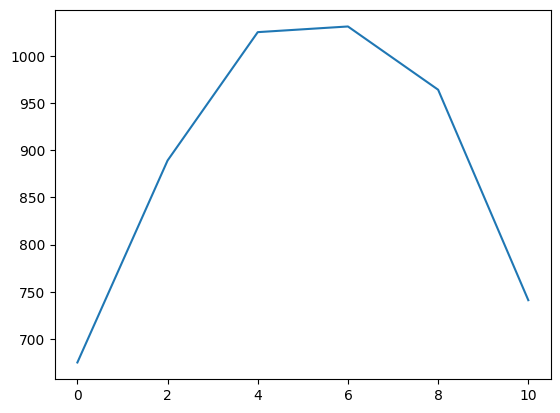

In [27]:
df_group_by[df_group_by['Type']=='Free']['count'].plot()

<AxesSubplot: >

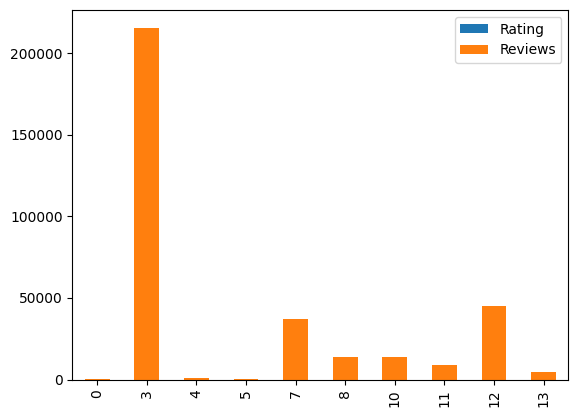

In [28]:
df_bar = df_high_rating[['Rating','Reviews']][:10]
df_bar['Reviews'] = df_bar['Reviews'].astype(int)

df_bar.plot.bar(stacked = True)

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

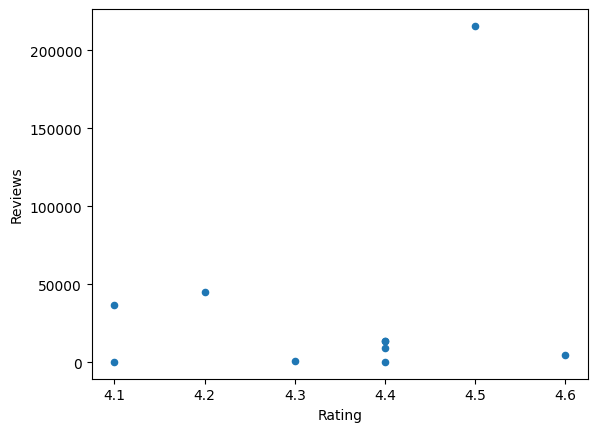

In [29]:
df_bar.plot.scatter(x='Rating', y='Reviews')

## Exporting the Data

* `df.to_csv(filename)` - Writes to a CSV file
* `df.to_excel(filename)` - Writes to an Excel file
* `df.to_sql(table_name, connection_object)` - Writes to a SQL table
* `df.to_json(filename)` - Writes to a file in JSON format
* `df.to_html(filename)` - Saves as an HTML table

In [30]:
# df_new_cols_name.to_csv('../data/cleaned_googleplay_data.csv')

# Cool Tricks

In [31]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

/tmp/ipykernel_4562/3279769219.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


__Show installed version__:

In [32]:
## show installed version
print(pd.__version__)
print(pd.show_versions())

1.5.1


/home/tamoghna/.cache/pypoetry/virtualenvs/python-tutorial-4D03WsXq-py3.8/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 91111fd99898d9dcaa6bf6bedb662db4108da6e6
python           : 3.8.10.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.102.1-microsoft-standard-WSL2
Version          : #1 SMP Wed Mar 2 00:30:59 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : C.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.1
numpy            : 1.23.4
pytz             : 2022.5
dateutil         : 2.8.2
setuptools       : 60.6.0
pip              : 22.0.3
Cython           : None
pytest           : 7.2.0
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : None
brotli 

__Rename column - more ways__:

In [33]:
## rename column - more ways
df_test.rename({'City':'city_new', 'State':'state_new'}, axis='columns', inplace=True)
df_test

,city_new,state_new
0,Kolkata,West Bengal
1,Bangalore,Karnataka


In [34]:
df_test.columns = df_test.columns.str.replace('_', "-")
df_test

,city-new,state-new
0,Kolkata,West Bengal
1,Bangalore,Karnataka


In [35]:
df_test = df_test.add_prefix('tableX')
df_test = df_test.add_suffix('dbY')
df_test

,tableXcity-newdbY,tableXstate-newdbY
0,Kolkata,West Bengal
1,Bangalore,Karnataka


__Reverse row order__:

In [36]:
## reverse row order
drinks.loc[::-1].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
192,Zimbabwe,64,18,4,4.7,Africa
191,Zambia,32,19,4,2.5,Africa
190,Yemen,6,0,0,0.1,Asia
189,Vietnam,111,2,1,2.0,Asia
188,Venezuela,333,100,3,7.7,South America


In [37]:
drinks.loc[::-1].reset_index(drop=True).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Zimbabwe,64,18,4,4.7,Africa
1,Zambia,32,19,4,2.5,Africa
2,Yemen,6,0,0,0.1,Asia
3,Vietnam,111,2,1,2.0,Asia
4,Venezuela,333,100,3,7.7,South America


__Reverse column order__:

In [38]:
## reverse column order
drinks.loc[:, ::-1].head()

,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings,country
0,Asia,0.0,0,0,0,Afghanistan
1,Europe,4.9,54,132,89,Albania
2,Africa,0.7,14,0,25,Algeria
3,Europe,12.4,312,138,245,Andorra
4,Africa,5.9,45,57,217,Angola


__Select columns by data type__:

In [39]:
## select columns by data type
drinks.select_dtypes(include='number').head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [40]:
drinks.select_dtypes(exclude='number').head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


__Convert string to number__:

In [41]:
## convert string to number
df_test = pd.DataFrame({'col_one':['1.1', '2.2', '3.3'],
                        'col_two':['4.4', '5.5', '6.6'],
                        'col_three':['7.7', '8.8', '-']})

# convert any invalid to NaN, then fill NaN with 0
pd.to_numeric(df_test.col_three, errors='coerce').fillna(0)

0    7.7
1    8.8
2    0.0
Name: col_three, dtype: float64

In [42]:
df_test = df_test.apply(pd.to_numeric, errors='coerce').fillna(0)
df_test

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,0.0


__Reading and building multiple files together (row wise)__

```python
from glob import glob
stock_files = sorted(glob('../data/stock*.csv'))
df_new = pd.concat((pd.read_csv(f) for f in stock_files), ignore_index=True)
```

__Reading and building multiple files together (column wise)__

```python
from glob import glob
stock_files = sorted(glob('../data/stock*.csv'))
df_new = pd.concat((pd.read_csv(f) for f in stock_files), axis='columns')
```

__Create dataframe from clipboard__

`pd.read_clipboard()` -> copy table from excel and execute this command. the data will get loaded

__Split dataframe into 2 random subsets__:

In [43]:
## split dataframe into 2 random subsets

len(movies)

979

In [44]:
movie_1 = movies.sample(frac=0.75, random_state=1234)
movie_2 = movies.drop(movie_1.index) # drop index from the subsetted dataframe to get the remaining

len(movie_1), len(movie_2)

(734, 245)

__Filter dataframe by multiple categories__:

In [45]:
## filter dataframe by multiple categories

movies[movies.genre.isin(['Action','Drama'])].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


In [46]:
movies[~movies.genre.isin(['Action','Drama'])].head() # showing genre not in list

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."


__Filter a dataframe by largest categories__:

In [47]:
## filter a dataframe by largest categories

counts = movies.genre.value_counts() # count of each genre
counts.nlargest(3) # getting top 3 counts

Drama     278
Comedy    156
Action    136
Name: genre, dtype: int64

In [48]:
counts.nlargest(3).index # able to get category names using index

Index(['Drama', 'Comedy', 'Action'], dtype='object')

In [49]:
movies[movies.genre.isin(counts.nlargest(3).index)].head() # using the above index logic to filter

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


__Handle missing values__:

In [50]:
## handle missing values

ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [51]:
ufo.isna().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [52]:
ufo.isna().mean()

City               0.001371
Colors Reported    0.842004
Shape Reported     0.144948
State              0.000000
Time               0.000000
dtype: float64

In [53]:
ufo.dropna(thresh=len(ufo)*0.9, axis='columns').head() # thresh is telling pandas to keep columns where 90% of data are not missing

,City,State,Time
0,Ithaca,NY,1930-06-01 22:00:00
1,Willingboro,NJ,1930-06-30 20:00:00
2,Holyoke,CO,1931-02-15 14:00:00
3,Abilene,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NY,1933-04-18 19:00:00


__Split string into multiple columns__:

In [54]:
## split string into multiple columns

df_test = pd.DataFrame({'name':['John Arthur Doe', 'Jane Ann Smith'],
                        'location':['Los Angeles, CA', 'Washington, DC']})
df_test

,name,location
0,John Arthur Doe,"Los Angeles, CA"
1,Jane Ann Smith,"Washington, DC"


In [55]:
df_test[['first_name', 'middle_name', 'last_name']] = df_test.name.str.split(' ', expand=True)
df_test

,name,location,first_name,middle_name,last_name
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith


In [56]:
df_test['city'] = df_test.location.str.split(', ', expand=True)[0] # only requiring city
df_test

,name,location,first_name,middle_name,last_name,city
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe,Los Angeles
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith,Washington


__Expand series of list to dataframe__:

In [57]:
## expand series of list to dataframe

df_test = pd.DataFrame({'col_one':['a', 'b', 'c'], 'col_two':[[10, 40], [20, 50], [30, 60]]})
df_test

,col_one,col_two
0,a,"[10, 40]"
1,b,"[20, 50]"
2,c,"[30, 60]"


In [58]:
df_new = df_test.col_two.apply(pd.Series)
df_new

,0,1
0,10,40
1,20,50
2,30,60


In [59]:
pd.concat([df_test, df_new], axis='columns')

,col_one,col_two,0,1
0,a,"[10, 40]",10,40
1,b,"[20, 50]",20,50
2,c,"[30, 60]",30,60


__Combine the output of an aggregation with actual DataFrame - `transform`__:

In [60]:
## Combine the output of an aggregation with actual DataFrame

orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [61]:
orders.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [62]:
len(orders)

4622

In [63]:
# we need to have same shape of actual df and agg df using transform

orders['total_price'] = orders.groupby('order_id').item_price.transform(sum)
orders.head()

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56
1,1,1,Izze,[Clementine],3.39,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98


__Reshape a multiindexed series, Pivot table, Crosstab__:

In [64]:
## reshape a multiindexed series

titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [65]:
## create a pivot table

# margin helps to get the sum of rows, columns, and overall sum
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [66]:
## verifying overall sum using regular mean

titanic.Survived.mean()

0.3838383838383838

In [67]:
## crosstab

pd.crosstab(index=titanic.Sex, columns=titanic.Pclass, values=titanic.Survived, aggfunc='mean', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [68]:
display(pd.crosstab(index=titanic.Sex, columns=titanic.Pclass, margins=True))
display(titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='count', margins=True))

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


__Check for equality__:

In [69]:
## check for equality

df_test = pd.DataFrame({'c':[1, 2, 3], 'd':[1.0, 2.0, 3.0], 'e':[1.0, 2.0, 3.000005]})
df_test

,c,d,e
0,1,1.0,1.000000
1,2,2.0,2.000000
2,3,3.0,3.000005


In [70]:
# we will get false since dtype is different
df_test.c.equals(df_test.d)

False

In [71]:
# for more flexibility
pd.testing.assert_series_equal(df_test.c, df_test.d, check_names=False, check_dtype=False)

In [72]:
# to ignore exact values and check for rounded off values
pd.testing.assert_series_equal(df_test.d, df_test.e, check_names=False, check_exact=False)

In [73]:
# check if df are identical
df_new = df_test.copy()

pd.testing.assert_frame_equal(df_new, df_test) # use it as assertion
df_new.equals(df_test) # use to get boolean response

True

__Count number of words in a column__:

In [74]:
## count number of words in a column

ufo['Colors Reported'].value_counts()

RED                       780
GREEN                     531
ORANGE                    528
BLUE                      450
YELLOW                    169
RED GREEN                  89
RED BLUE                   78
RED ORANGE                 44
GREEN BLUE                 34
RED GREEN BLUE             33
ORANGE YELLOW              26
RED YELLOW                 25
ORANGE GREEN               23
YELLOW GREEN               17
ORANGE BLUE                10
RED YELLOW GREEN            9
YELLOW BLUE                 6
YELLOW GREEN BLUE           5
ORANGE GREEN BLUE           5
RED YELLOW GREEN BLUE       4
RED ORANGE YELLOW           4
RED YELLOW BLUE             3
RED ORANGE GREEN            3
RED ORANGE BLUE             3
RED ORANGE YELLOW BLUE      1
ORANGE YELLOW GREEN         1
ORANGE YELLOW BLUE          1
Name: Colors Reported, dtype: int64

In [75]:
(ufo['Colors Reported'].str.count(' ')+1).value_counts()

1.0    2458
2.0     352
3.0      67
4.0       5
Name: Colors Reported, dtype: int64

__Convert one set of values to another__:

In [76]:
## convert one set of values to another

titanic['Sex_ID'] = titanic.Sex.map({'female':1, 'male':0})
titanic[['Sex', 'Sex_ID']].head(10)

,Sex,Sex_ID
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


In [77]:
# instead of manually entering pairs, get it automatically using factorize
titanic['Embarked_ID'] = titanic.Embarked.factorize()[0]
titanic[['Embarked', 'Embarked_ID']].head(10)

,Embarked,Embarked_ID
0,S,0
1,C,1
2,S,0
3,S,0
4,S,0
5,Q,2
6,S,0
7,S,0
8,S,0
9,C,1


In [78]:
titanic.Embarked.factorize()[1]

Index(['S', 'C', 'Q'], dtype='object')

In [79]:
# convert any non-0 to 1 and keep 0s as 0

titanic['SibSp_binary'] = (titanic.SibSp > 0).astype('int')
titanic[['SibSp', 'SibSp_binary']].head(10)

,SibSp,SibSp_binary
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,3,1
8,0,0
9,1,1


In [80]:
## convert continous to categorical

pd.cut(titanic.Age, bins=[titanic.Age.min(),18,25,60,titanic.Age.max()], labels=['child', 'young_adult', 'adult', 'senior_citizen']).sample(10)

650               NaN
249             adult
272             adult
656               NaN
555    senior_citizen
453             adult
760               NaN
699             adult
480             child
841             child
Name: Age, dtype: category
Categories (4, object): ['child' < 'young_adult' < 'adult' < 'senior_citizen']

__Resample__:

In [81]:
## resample -> groupby for datetime column

# D = sampling frequency, can be Y, M
# on = column to perform groupby
stocks.resample('D', on='Date').Close.mean()

Date
2016-10-03    67.146667
2016-10-04    67.196667
2016-10-05    67.426667
Freq: D, Name: Close, dtype: float64

In [82]:
ufo.resample('Y', on='Time').State.count()

Time
1930-12-31       2
1931-12-31       2
1932-12-31       0
1933-12-31       1
1934-12-31       1
              ... 
1996-12-31     851
1997-12-31    1237
1998-12-31    1743
1999-12-31    2774
2000-12-31    2635
Freq: A-DEC, Name: State, Length: 71, dtype: int64

__Fill missing values with interpolation__:

```python
df_test.interpolate()
```

__Melting__:

In [83]:
## melting - reshape dataframe from wide to long format -> from more columns to more rows

distances = pd.DataFrame([['12345', 100, 200, 300], ['34567', 400, 500, 600], ['67890', 700, 800, 900]],
                          columns=['zip', 'factory', 'warehouse', 'retail'])
distances
# the numbers shows distance of eaach location type against the zip code

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [84]:

distances = pd.DataFrame([['12345', 100, 200, 300], ['34567', 400, 500, 600], ['67890', 700, 800, 900]],
                          columns=['zip', 'factory', 'warehouse', 'retail'])
distances
# the numbers shows distance of eaach location type against the zip code

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [85]:
users = pd.DataFrame([[1, '12345', 'factory'], [2, '34567', 'warehouse']],
                      columns=['user_id', 'zip', 'location_type'])
users

,user_id,zip,location_type
0,1,12345,factory
1,2,34567,warehouse


In [86]:
# merging is required but values of column of one dataframe matches values of rows of another dataframe
# hence need to melt

distances_long = distances.melt(id_vars='zip', var_name='location_type', value_name='distance')
distances_long

,zip,location_type,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


In [87]:
pd.merge(users, distances_long)

,user_id,zip,location_type,distance
0,1,12345,factory,100
1,2,34567,warehouse,500
